# Introdução

Uma grande empresa, chamada XYZ, emprega aproximadamente 4000 funcionários. Entretanto, todo ano, aproximadamente 15% dos empregados deixa a empresa e precisam ser substituídos. A gestão acredita que essa taxa de saída de funcionários (seja por conta própria ou por demissão) é ruim para a empresa, por razões como:



1.   Os projetos acabam atrasando, o que diminui a reputação entre clientes e parceiros;
2.   É necessário manter um departamento considerável para contratar novas pessoas;
3. Na maioria das vezes os novos empregados precisam ser treinados para o cargo e/ou precisam de tempo para se acostumar com a empresa.

Considerando isso, o objetivo desse projeto é modelar a probabilidade de um funcionário sair da empresa. Também é importante entender quais variáveis são mais importantes para que a gestão possa corrigir o problema na empresa.

# Configurações iniciais

Essas são algumas configurações inicias que serão usadas ao longo de todo o notebook, como importações de bibliotecas. Também é fixada uma seed para garantir reprodutibilidade na aleatoriedade.

In [1]:

import numpy as np
import os

seed = 31
np.random.seed(seed)

%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Conjunto de dados

Vamos começar a entender os dados que possuímos. Primeiros, vamos pegar os dados do csv:

In [2]:
import pandas as pd

employee_dataset = pd.read_csv("data.csv")

Vamos observar as primeiras linhas dos dados:

In [3]:
employee_dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Perceba que os dados estão ordenados pelo EmployeeId. Mais tarde trataremos de randomizar a ordem das linhas (embaralhar os dados).

Vamos entender o que cada coluna quer dizer.

1. Age: Idade do empregado;
2. Attrition: Se o empregado saiu da empresa no ano anterior ou não;
3. BusinessTravel: Com que frequência o empregado fez viagens à negócio no último ano;
4. Department: Departamento dentro da empresa;
5. DistanceFromHome: Distância do local de trabalho até a casa do empregado em kms;
6. Education: Level de educação. São valores de 1 à 5 que significam 'Bellow College', 'College', 'Bachelor', 'Master', 'Doctor';
7. EducationField: Área de estudo;
8. EmployeeCount: Número de empregos;
9. EmployeeId: Id/número do empregado;
10. Gender: Gênero;
11. JobLevel: Nível do trabalho na empresa em uma escala de 1 a 5.
12. JobRole: Nome do cargo do trabalhador na empresa;
13. MaritalStatus: Estado civil do empregado;
14. MontlyIncome: Renda mensal em rupias por mês;
15. NumCompaniesWorked: Número de empresas para as quais o empregado já trabalhou.
16. Over18: Se o empregado possui mais de 18 anos ou não.
17. PercentSalaryHike: Aumento salarial percentual no último ano;
18. StandardHours: Número de horas de trabalho usual do empregado;
19. StockOptionLevel: Nível de ações da empresa concedidas ao empregado;
19. TotalWorkingYears: Número total de anos em que o empregado trabalhou até agora;
20. TrainingTimesLastYear: Número de vezes que o empregado recebeu um treinamento no último ano;
21. YearsAtCompany: Número total de anos do empregado na empresa;
22. YearsSinceLastPromotion: Número de anos desde a última promoção;
23. YearsWithCurrManager: Número de anos que o empregado ficou submetido ao seu gerente atual.


Observemos o formato dos dados e algumas linhas aleatórias:

In [4]:
print(employee_dataset.shape)
employee_dataset.sample(n = 10)

(4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4309,58,No,Travel_Rarely,Sales,3,3,Marketing,1,4310,Female,...,4.0,Y,11,8,3,9.0,4,1,0,0
1624,46,No,Travel_Rarely,Sales,19,4,Marketing,1,1625,Female,...,2.0,Y,14,8,0,19.0,5,10,0,8
2055,26,No,Travel_Rarely,Research & Development,1,4,Life Sciences,1,2056,Male,...,1.0,Y,21,8,1,8.0,3,8,0,7
1420,40,No,Non-Travel,Research & Development,28,2,Life Sciences,1,1421,Male,...,9.0,Y,22,8,0,5.0,2,3,0,2
2288,54,No,Travel_Frequently,Sales,10,3,Life Sciences,1,2289,Female,...,3.0,Y,12,8,0,26.0,3,14,1,12
2966,26,No,Travel_Frequently,Research & Development,9,3,Life Sciences,1,2967,Female,...,1.0,Y,22,8,0,5.0,3,5,3,3
4357,29,Yes,Travel_Rarely,Sales,10,2,Life Sciences,1,4358,Female,...,1.0,Y,19,8,2,10.0,2,10,1,9
1880,28,No,Travel_Rarely,Research & Development,10,3,Life Sciences,1,1881,Female,...,5.0,Y,20,8,1,6.0,2,2,2,2
929,38,No,Travel_Frequently,Research & Development,19,2,Life Sciences,1,930,Male,...,7.0,Y,12,8,1,19.0,3,13,2,9
3276,29,No,Travel_Rarely,Research & Development,10,3,Other,1,3277,Male,...,1.0,Y,11,8,0,10.0,3,10,0,7


Perceba que temos um total de 4410 linhas e 24 colunas, das quais 23 são features e uma é o rótulo (Attrition)

Vamos verificar o formato dos nossos dados:

In [5]:
employee_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Perceba que Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18 são todos dados não numéricos, e 4391 linhas tem o parâmetro "NumCompaninesWorked" como não nulo, de um total de 4410. Isto é, 19 desses dados estão classificados como nulo. Temos a mesma questão com o parâmetro TotalWorkingYears, que apresenta 9 dados nulos. Precisaremos tratar desses dados para torná-los apropriados ao treinamento de modelos.

Vamos agora observar algumas estátisticas básicas dos nossos dados:

In [6]:
employee_dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Note que o desvio-padrão do número de empregos (EmployeeCount) é 0 e a média é 1, o que indica que todos os trabalhadores têm um único emprego. Então, essa coluna é irrelevante para nós. O mesmo ocorre para a carga horária de trabalho (StandardHours), que tem desvio padrão 0 e média 8.

Vamos observar a contagem de cada label dos dados não-numéricos:

In [7]:
employee_dataset["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [8]:
employee_dataset["BusinessTravel"].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [9]:
employee_dataset["Department"].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [10]:
employee_dataset["EducationField"].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [11]:
employee_dataset["Gender"].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [12]:
employee_dataset["JobRole"].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [13]:
employee_dataset["MaritalStatus"].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [14]:
employee_dataset["Over18"].value_counts()

Y    4410
Name: Over18, dtype: int64

Perceba que "Over18" é sempre assinalado com "Y" (Isto é, todos os trabalhadores têm mais de 18 anos). Então esse dado é irrelevante para o treinamento do modelo.

Vamos observar alguns histogramas da distribuição dos dados:

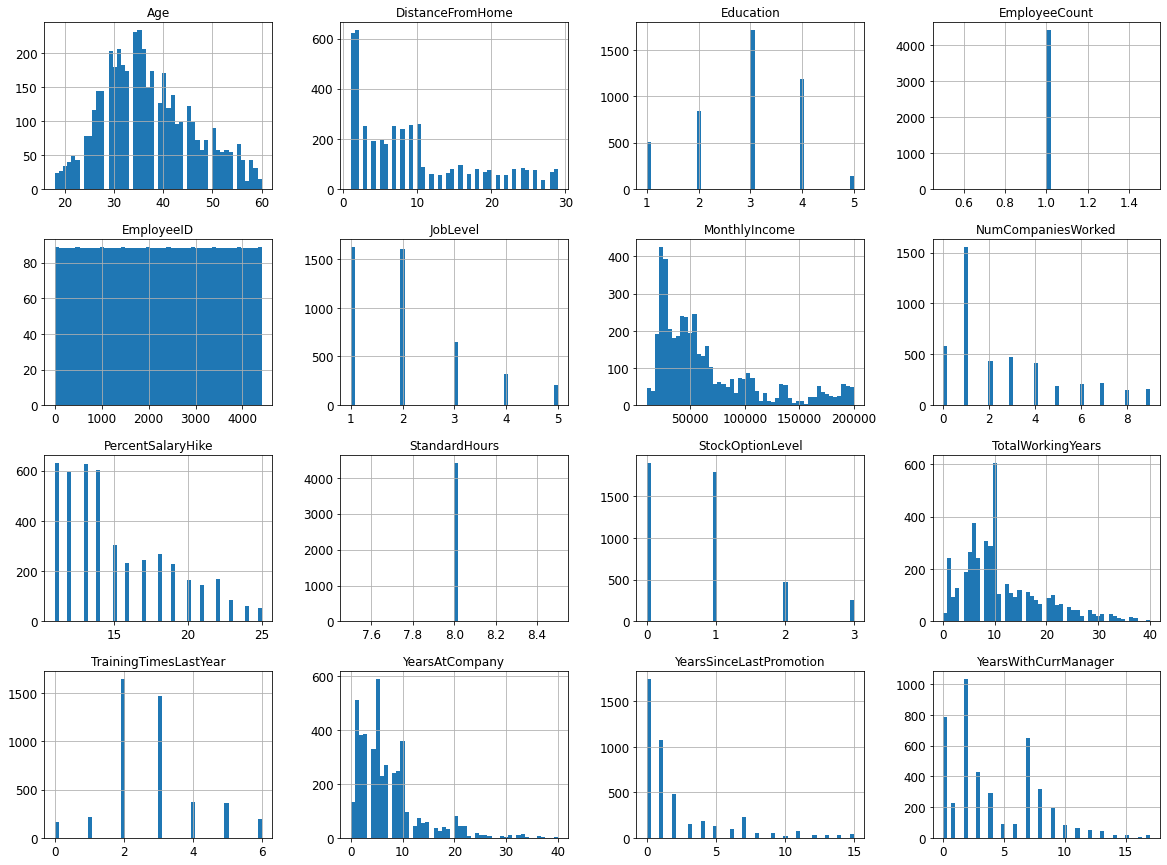

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
employee_dataset.hist(bins=50, figsize=(20,15))
plt.show()

Perceba que os histogramas confirmam o fato das colunas EmployeeCount e StandardHours serem dispensáveis.

Uma coluna curiosa é o EmployeeId. É intuitivo pensar que este não é um dado relevante no nosso projeto (em que o número do seu Id interfere no fato da pessoa sair da empresa?), mas mantive ele aí, pois pode estar codificando alguma informação interessante do empregado, dependendo de como esse Id é atribuído a ele pela empresa.

# Separação em treino e teste

Vamos dividir nossos dados em treino e teste, como de costume. Separei 20% do conjunto para teste. A função train_test_split do scikit-learn irá embaralhar os dados.

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(employee_dataset, 
                                       test_size=0.2,
                                       random_state=seed)

# Visualização da estrutura dos dados

Vamos tentar visualizar algum tipo de estrutura nos nossos dados de treino. Começamos fazendo uma cópia dos dados:

In [17]:
employee = train_set.copy()
  

Para visualizar melhor a estrutura dos dados, vamos tirar as colunas numericas "EmployeeCount" e "StandardHours", que não são informativas. 
Também vamos adicionar um novo atributo "Attrition_Num" que substitui os valores categóricos Yes/No de "Attrition" por 1/0, respectivamente. Assim, esses dados irão aparecer na matriz de correlação 

In [18]:

employee = employee.drop(["EmployeeCount", "StandardHours"],axis=1)
employee_attrition = []
for i in range (employee["Attrition"].size):
  if (employee["Attrition"].values[i] == "Yes"):
    employee_attrition.append(1)
  else:
    employee_attrition.append(0)
employee["Attrition_Num"] = employee_attrition

In [19]:
corr_matrix = employee.corr()
corr_matrix

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Num
Age,1.000000,0.005012,-0.034956,0.008858,0.015375,-0.047349,0.302437,-0.026457,-0.030157,0.682359,-0.030997,0.303106,0.219825,0.199226,-0.152932
DistanceFromHome,0.005012,1.000000,-0.012839,-0.003293,-0.033245,-0.023709,-0.006956,0.041173,-0.005681,0.002171,-0.002813,0.032059,-0.004702,0.016723,-0.018214
Education,-0.034956,-0.012839,1.000000,-0.017178,0.050645,0.021111,-0.016989,-0.046013,0.006010,-0.001942,0.012123,0.014487,0.030365,0.016169,-0.026517
EmployeeID,0.008858,-0.003293,-0.017178,1.000000,0.015803,0.022726,-0.002186,-0.008689,-0.009959,-0.007386,-0.013069,0.003999,-0.010705,0.003501,-0.011147
JobLevel,0.015375,-0.033245,0.050645,0.015803,1.000000,0.048008,0.002620,0.010443,-0.001725,-0.032351,-0.033479,-0.064146,-0.055239,-0.054015,-0.001094
MonthlyIncome,-0.047349,-0.023709,0.021111,0.022726,0.048008,1.000000,-0.029091,0.001796,0.026043,-0.038531,0.055977,-0.008314,0.049554,0.012598,-0.033436
NumCompaniesWorked,0.302437,-0.006956,-0.016989,-0.002186,0.002620,-0.029091,1.000000,0.034411,0.024839,0.244347,-0.040735,-0.126791,-0.052217,-0.125122,0.043830
PercentSalaryHike,-0.026457,0.041173,-0.046013,-0.008689,0.010443,0.001796,0.034411,1.000000,0.012587,-0.020284,-0.032221,-0.035765,-0.030011,-0.041407,0.029474
StockOptionLevel,-0.030157,-0.005681,0.006010,-0.009959,-0.001725,0.026043,0.024839,0.012587,1.000000,0.003859,-0.064317,0.011166,0.021446,0.025106,-0.008809
TotalWorkingYears,0.682359,0.002171,-0.001942,-0.007386,-0.032351,-0.038531,0.244347,-0.020284,0.003859,1.000000,-0.042225,0.619083,0.401414,0.451427,-0.167060


Vejamos agora quais features se relacionam mais com a feature Attrition_Num:

In [20]:

corr_matrix["Attrition_Num"].sort_values(ascending=False)

Attrition_Num              1.000000
NumCompaniesWorked         0.043830
PercentSalaryHike          0.029474
JobLevel                  -0.001094
StockOptionLevel          -0.008809
EmployeeID                -0.011147
DistanceFromHome          -0.018214
Education                 -0.026517
YearsSinceLastPromotion   -0.032546
MonthlyIncome             -0.033436
TrainingTimesLastYear     -0.035911
YearsAtCompany            -0.134529
Age                       -0.152932
YearsWithCurrManager      -0.154764
TotalWorkingYears         -0.167060
Name: Attrition_Num, dtype: float64

Perceba que apenas dois parâmetros têm uma correlação positiva com Attrition = Yes, que são NumCompaniesWorked e PercentSalaryHike (este último é curioso, pois intuitivamente se pensaria o contrário). Mas são correlações com valores baixos, ou seja, correlações não muito fortes. Aparantemente, o dado que mais se relaciona o Attrition é o TotalWorkingYears, que influencia o empregado a não abandonar a empresa.

Vamos agora investigar os dados categóricos. A função abaixo mostra em gráfico a quantidade de sim/não em "Attrition" por categoria, para cada coluna com valor categórico:

In [21]:
def show_number_of_attrition_by_cat(category):
  employee_category = employee[category].unique()
  employee_category_axis = np.arange(len(employee_category))

  yes_category = train_set.loc[employee['Attrition'] == 'Yes'].groupby(category).size()
  no_category = train_set.loc[employee['Attrition'] == 'No'].groupby(category).size()

  plt.bar(employee_category_axis - 0.2, yes_category, 0.2, label = 'Yes')
  plt.bar(employee_category_axis + 0.2, no_category, 0.2, label = 'No')
  
  plt.xticks(employee_category_axis, employee_category)
  plt.xticks(rotation=60, ha="right")
  plt.xlabel(category)
  plt.ylabel("Number of attrition")
  plt.title("Number of attrition by " + category)
  plt.legend()
  plt.show()


Vamos plotar esses gráficos para os parâmetros categóricos:

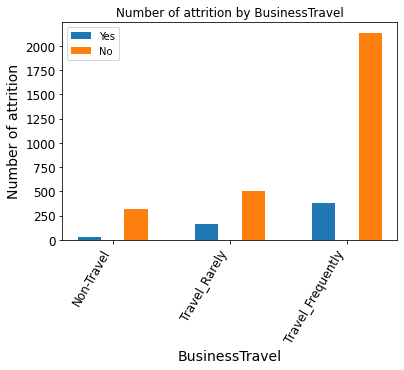

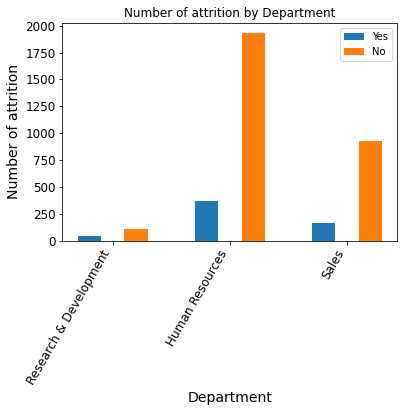

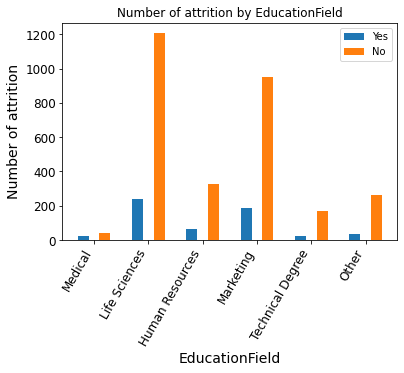

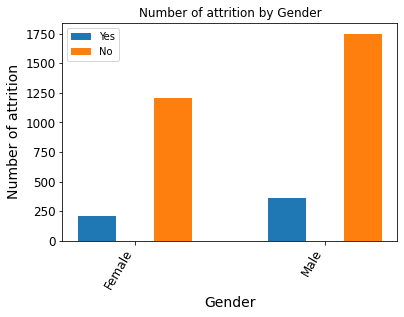

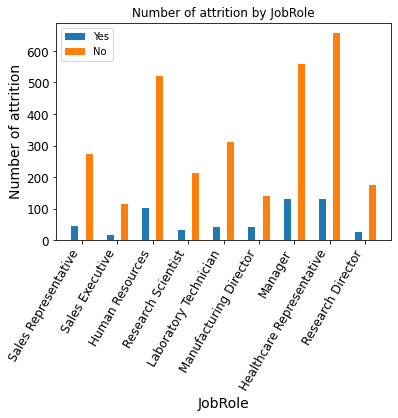

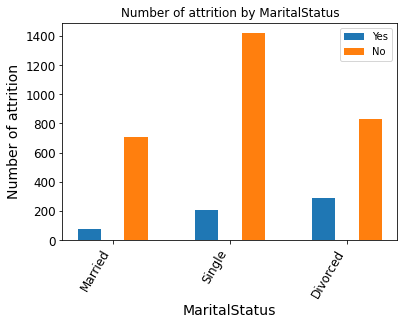

In [22]:
show_number_of_attrition_by_cat('BusinessTravel')
show_number_of_attrition_by_cat('Department')
show_number_of_attrition_by_cat('EducationField')
show_number_of_attrition_by_cat('Gender')
show_number_of_attrition_by_cat('JobRole')
show_number_of_attrition_by_cat('MaritalStatus')

Para ser mais revelador, vamos analisar a proporção de Sim/Não em cada categoria, através de gráficos de barra, que são construídos na função abaixo:

In [23]:
def show_proportion_of_attrition_by_cat(category):
  employee_category = employee[category].unique()
  employee_category_axis = np.arange(len(employee_category))

  yes_category = train_set.loc[employee['Attrition'] == 'Yes'].groupby(category).size()
  no_category = train_set.loc[employee['Attrition'] == 'No'].groupby(category).size()

  proportion = yes_category/no_category

  plt.bar(employee_category_axis - 0.2, proportion, 0.2, label = 'Proportion Yes/No')
    
  plt.xticks(employee_category_axis, employee_category)
  plt.xlabel(category)
  plt.xticks(rotation=60, ha="right")
  plt.ylabel("Proportion")
  plt.title("Proportion between yes and no in attrition by " + category)
  plt.legend()
  plt.show()

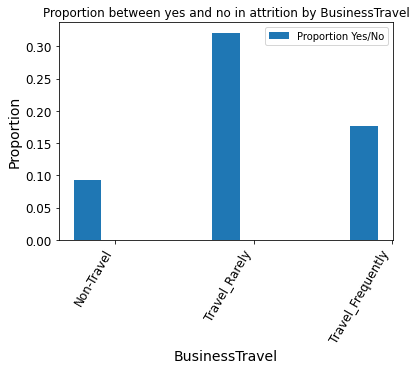

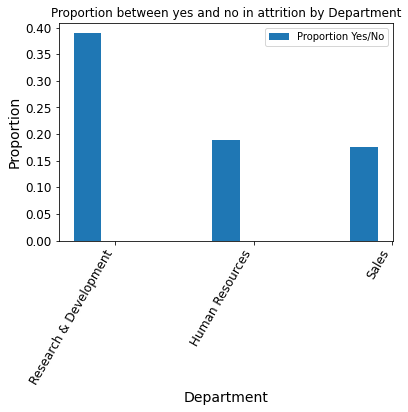

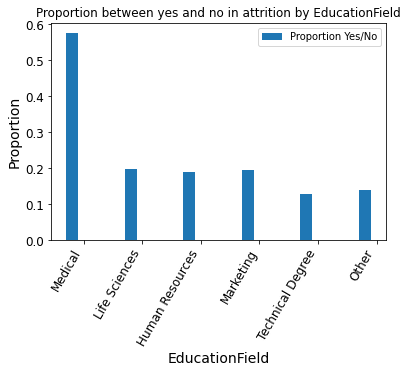

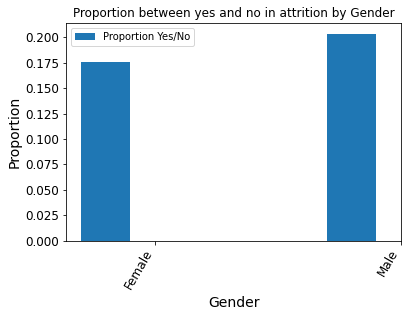

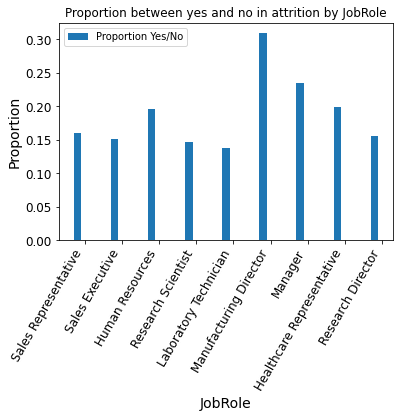

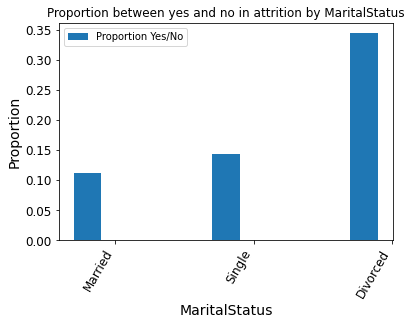

In [24]:
show_proportion_of_attrition_by_cat('BusinessTravel')
show_proportion_of_attrition_by_cat('Department')
show_proportion_of_attrition_by_cat('EducationField')
show_proportion_of_attrition_by_cat('Gender')
show_proportion_of_attrition_by_cat('JobRole')
show_proportion_of_attrition_by_cat('MaritalStatus')

Analisando esses gráficos, alguns dos dados que parecem ter uma maior correlação com o nível de attrition são:   
  - EducationField como Medical;
  - Department como Reserach and Development;
  - MaritalStatus como Divorced;

# Feature engenering

Vamos adicionar algumas colunas aos nossos dados. A primeira coluna é o tempo médio que o empregado ficou em cada empresa, dado pelo total de tempo trabalhado durante sua vida dividido pelo número de companias em que trabalhou. Esse parâmetro pode tentar simbolizar o perfil de uma pessoa: se for um valor baixo, quer dizer que a pessoa não fica muito tempo nas empresas que trabalha. Se for um valor alto indica que a pessoa geralmente procura por estabilidade. Se trabalhou em 0 companias, coloquei esse valor como zero.


In [25]:
mean_working_time_at_companies  = []
for i in range (employee["NumCompaniesWorked"].size):
  if (employee["NumCompaniesWorked"].values[i] == 0):
    mean_working_time_at_companies.append(0);
  else:
    mean_working_time_at_companies.append(employee["TotalWorkingYears"].values[i] / employee["NumCompaniesWorked"].values[i])
employee["MeanWorkingTimeAtCompanies"] = mean_working_time_at_companies
   

A próxima feature adicionada representa a fração entre o número de anos desde a última promoção e quantidade de anos na empresa. Um valor alto nessa fração pode indicar que o empregado ficou uma proporção alta de tempo na empresa sem receber aumento, o que, intuitivamente, pode contribuir para que queira sair da empresa. Se está a 0 anos na empresa, este valor é setado para 0.

In [26]:
fraction_of_years_since_last_promotion  = []
for i in range (employee["YearsAtCompany"].size):
  if (employee["YearsAtCompany"].values[i] == 0):
    fraction_of_years_since_last_promotion.append(0);
  else:
    fraction_of_years_since_last_promotion.append(employee["YearsSinceLastPromotion"].values[i] / employee["YearsAtCompany"].values[i])
employee["FractionOfYearsSinceLastPromotion"] = fraction_of_years_since_last_promotion

A feature seguinte busca representar a fração do tempo de vida do empregado em que ele trabalhou em alguma empresa. Talvez pessoas que passaram uma maior parte de sua vida trabalhando busquem maior estabilidade.

In [27]:
fraction_of_working_years_in_entire_life = []
for i in range (employee["Age"].size):
  # if (employee["Age"].values[i] == 0):  Desnecessário uma vez que Age =/= 0 sempre.
  #   fraction_of_working_years_in_entire_life.append(0);
  # else:
  fraction_of_working_years_in_entire_life.append(employee["TotalWorkingYears"].values[i] / employee["Age"].values[i])
employee["FractionOfWorkingYearsEntireLife"] = fraction_of_working_years_in_entire_life

Por último, calculo o aumento salarial da pessoa no último ano. Para isso, pego seu salário atual (MonthlyIncome), e utilizo o percentual de aumento salarial do último aluno (PercentSalaryHike) para estimar o aumento recebido no último ano. Perceba que se x era o salário do empregado antes dos aumentos do ano passado, então:
  

    x*(1 + PercentSalaryHike/100) = MonthlyIncome

    x = MonthlyIncome/(1 + PercentSalaryHike/100)


Então o aumento salarial é de MonthlyIncome - x, isto é:

    salary_hike = MonthlyIncome - MonthlyIncome/(1 + PercentSalaryHike/100)
                = MonthlyIncome*(1 - 1/(1 + PercentSalaryHike/100))


Essa feature pode ser interessante, pois é possível que o aumento salarial percentual do empregado seja mais ou menos alto, mas o valor bruto seja baixo pois seu salário já era baixo, o que pode desincentivar o empregado a ficar na empresa.

In [28]:
salary_hike = []
for i in range (employee["MonthlyIncome"].size):
  salary_hike.append(employee["MonthlyIncome"].values[i]*(1 - 1/(1 + employee["PercentSalaryHike"].values[i]/100)))
employee["SalaryHike"] = salary_hike

Vejamos agora como essas fetaures se relacionam:

In [29]:
corr_matrix = employee.corr()
corr_matrix

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Num,MeanWorkingTimeAtCompanies,FractionOfYearsSinceLastPromotion,FractionOfWorkingYearsEntireLife,SalaryHike
Age,1.000000,0.005012,-0.034956,0.008858,0.015375,-0.047349,0.302437,-0.026457,-0.030157,0.682359,-0.030997,0.303106,0.219825,0.199226,-0.152932,0.264380,0.056684,0.459045,-0.046523
DistanceFromHome,0.005012,1.000000,-0.012839,-0.003293,-0.033245,-0.023709,-0.006956,0.041173,-0.005681,0.002171,-0.002813,0.032059,-0.004702,0.016723,-0.018214,0.011395,-0.003170,0.012276,-0.011409
Education,-0.034956,-0.012839,1.000000,-0.017178,0.050645,0.021111,-0.016989,-0.046013,0.006010,-0.001942,0.012123,0.014487,0.030365,0.016169,-0.026517,0.020804,0.003452,0.016803,0.012132
EmployeeID,0.008858,-0.003293,-0.017178,1.000000,0.015803,0.022726,-0.002186,-0.008689,-0.009959,-0.007386,-0.013069,0.003999,-0.010705,0.003501,-0.011147,0.001311,-0.008305,-0.010125,0.020989
JobLevel,0.015375,-0.033245,0.050645,0.015803,1.000000,0.048008,0.002620,0.010443,-0.001725,-0.032351,-0.033479,-0.064146,-0.055239,-0.054015,-0.001094,-0.067311,-0.024312,-0.042235,0.040687
MonthlyIncome,-0.047349,-0.023709,0.021111,0.022726,0.048008,1.000000,-0.029091,0.001796,0.026043,-0.038531,0.055977,-0.008314,0.049554,0.012598,-0.033436,-0.014886,0.049861,-0.024377,0.943411
NumCompaniesWorked,0.302437,-0.006956,-0.016989,-0.002186,0.002620,-0.029091,1.000000,0.034411,0.024839,0.244347,-0.040735,-0.126791,-0.052217,-0.125122,0.043830,-0.238141,0.013036,0.200651,-0.021360
PercentSalaryHike,-0.026457,0.041173,-0.046013,-0.008689,0.010443,0.001796,0.034411,1.000000,0.012587,-0.020284,-0.032221,-0.035765,-0.030011,-0.041407,0.029474,-0.039446,-0.017625,-0.026340,0.269720
StockOptionLevel,-0.030157,-0.005681,0.006010,-0.009959,-0.001725,0.026043,0.024839,0.012587,1.000000,0.003859,-0.064317,0.011166,0.021446,0.025106,-0.008809,0.035287,-0.014229,0.021194,0.028877
TotalWorkingYears,0.682359,0.002171,-0.001942,-0.007386,-0.032351,-0.038531,0.244347,-0.020284,0.003859,1.000000,-0.042225,0.619083,0.401414,0.451427,-0.167060,0.517548,0.050328,0.939043,-0.032490


In [30]:
corr_matrix["Attrition_Num"].sort_values(ascending=False)

Attrition_Num                        1.000000
NumCompaniesWorked                   0.043830
FractionOfYearsSinceLastPromotion    0.029594
PercentSalaryHike                    0.029474
JobLevel                            -0.001094
StockOptionLevel                    -0.008809
EmployeeID                          -0.011147
DistanceFromHome                    -0.018214
Education                           -0.026517
SalaryHike                          -0.028529
YearsSinceLastPromotion             -0.032546
MonthlyIncome                       -0.033436
TrainingTimesLastYear               -0.035911
MeanWorkingTimeAtCompanies          -0.113523
YearsAtCompany                      -0.134529
Age                                 -0.152932
YearsWithCurrManager                -0.154764
TotalWorkingYears                   -0.167060
FractionOfWorkingYearsEntireLife    -0.177892
Name: Attrition_Num, dtype: float64

Perceba que a feature FractionWorkingYearsEntireLife se tornou a feature com maior correlação com o fato da pessoa NÃO sair da empresa.  

FractionOfYearsSinceLastPromotion tem correlação (embora baixa) com Attrition, conforme esperado. 

SalaryHike e MeanWorkingTimeAtCompanies possuem relação negativa com o Attrition, como esperávamos. (Pessoas com maior aumento salarial bruto tendem a ficar na empresa, pessoas cujo tempo médio nas empresas é maior tendem a ficar na empresa). 

Entretanto, é interessante notar que nenhuma feature tem uma correlação aparente FORTE com o Attrition.

# Preparação dos dados

Vamos reiniciar os dados:

In [31]:
employee_train_dataset = train_set.drop("Attrition", axis=1)
employee_train_labels  = train_set["Attrition"].copy()

Vamos excluir as colunas irrelevantes para o nosso problema, que são Over18, EmployeeCount e StandardHours, como já foi mencionado. Para isso, criaremos uma classe que dropa as colunas, para, na posterioridade, incluir em um pipeline. 


In [32]:
class ColumnDropper():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

Vamos testar se nossa classe funcionou:

In [33]:
columnDropper = ColumnDropper(["Over18", "EmployeeCount", "StandardHours"])
X = columnDropper.transform(employee_train_dataset)

X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2578,39,Non-Travel,Research & Development,8,5,Medical,2579,Female,2,Sales Representative,Married,188240,6.0,19,1,10.0,4,3,1,2
1014,38,Travel_Rarely,Research & Development,8,2,Life Sciences,1015,Female,2,Sales Executive,Married,32010,1.0,11,1,5.0,3,5,0,4
3717,31,Travel_Rarely,Research & Development,16,4,Life Sciences,3718,Male,3,Human Resources,Single,42440,9.0,13,0,8.0,3,3,0,2
2813,50,Travel_Frequently,Research & Development,19,4,Life Sciences,2814,Male,2,Sales Executive,Single,53770,4.0,14,1,16.0,3,2,2,1
3795,32,Non-Travel,Research & Development,10,4,Life Sciences,3796,Female,5,Research Scientist,Married,23800,4.0,13,0,9.0,5,6,1,2


Perceba que funcionou. Vamos agora transformar os dados não-numéricos em dados numéricos. Para o campo Gender (gênero), como temos uma opção binária (Male/Female), podemos usar o OrdinalEncoder:

In [34]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
    print("Scikit-Learn >= 2.0")
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    print("Scikit-Learn antigo")

Scikit-Learn >= 2.0


In [35]:
employee_gender = employee_train_dataset[['Gender']]

ordinal_encoder = OrdinalEncoder()
employee_gender_encoded = ordinal_encoder.fit_transform(employee_gender)

employee_gender_encoded[:12]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

Poderíamos tentar usar o OrdinalEnconder também para os dados de BusinessTravel, já que eles são divididos em Non-Travel, Travel_Rarely e Travel_Frequently, o que indica uma progressão. Entretanto, não achei adequado fazer isso pois a escolha de valores (0, 1, 2) para os campos pode ser arbitrária, isto é, talvez Travel_Frequently merecesse receber um valor 4 vezes maior que o Travel_Rarely, ou algo do tipo, por exemplo.

As demais colunas (Department, EducationField, JobRole, MaritalStatus) não podem ser ordenadas (pelo menos não claramente) de modo a indicar uma progressão, portanto enumerá-las não faria sentido. Para estas, usaremos o OneHotEncoder, que já fora importado.

In [36]:
employee_businesstravel = employee_train_dataset[['BusinessTravel']]
employee_department = employee_train_dataset[['Department']]
employee_educationfield = employee_train_dataset[['EducationField']]
employee_jobrole = employee_train_dataset[['JobRole']]
employee_maritalstatus = employee_train_dataset[['MaritalStatus']]

oneHotEnconder = OneHotEncoder(sparse=False);

employee_businesstravel = oneHotEnconder.fit_transform(employee_businesstravel)
employee_department = oneHotEnconder.fit_transform(employee_department)
employee_educationfield = oneHotEnconder.fit_transform(employee_educationfield)
employee_jobrole = oneHotEnconder.fit_transform(employee_jobrole)
employee_maritalstatus = oneHotEnconder.fit_transform(employee_maritalstatus)

employee_businesstravel

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

Vamos agora procurar arrumar o problema dos dados nulos. Vamos rever algumas estatísticas das features que possuem dados nulos:

In [37]:
employee_train_dataset["NumCompaniesWorked"].describe()

count    3514.000000
mean        2.686397
std         2.485736
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [38]:
employee_train_dataset["TotalWorkingYears"].describe()

count    3520.000000
mean       11.264205
std         7.781111
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [39]:
print("NumCompaniesWorked:")
for i in range (9):
  print (employee_train_dataset[employee_train_dataset["NumCompaniesWorked"] == i].shape[0])

print("TotalWorkingYears:")
for i in range (40):
  print (employee_train_dataset[employee_train_dataset["TotalWorkingYears"] == i].shape[0])

NumCompaniesWorked:
466
1245
367
368
331
159
164
178
116
TotalWorkingYears:
27
191
73
98
157
209
306
189
244
232
491
93
109
86
79
94
88
78
63
50
74
75
49
50
43
37
30
16
35
25
19
21
16
21
12
9
16
8
2
0


Três estratégias podem ser aplicadas para resolver esse problema: Apagar as linhas com dados nulos, apagar as colunas com dados nulos ou imputar algum dado nessas células nulas.

Considerando que apenas NO MÁXIMO 28 linhas possuem dados nulos, de um total de 4410 linhas, exclui-lás se torna uma opção viável.

Vamos criar uma classe que elimina as linhas em que as colunas NumCompaniesWorked e TotalWorkingYears estejam com dados faltantes, para usar no pipeline:

In [40]:
class NullRowDropper():
    def transform(self,X,y=None):
        Y = X.dropna(subset=["NumCompaniesWorked"])
        Y = Y.dropna(subset=["TotalWorkingYears"])
        return Y

    def fit(self, X, y=None):
        return self 

Vamos ver se realmente funcionou:


In [41]:
nullRowDropper = NullRowDropper()
X = nullRowDropper.transform(employee_train_dataset)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 2578 to 2064
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3506 non-null   int64  
 1   BusinessTravel           3506 non-null   object 
 2   Department               3506 non-null   object 
 3   DistanceFromHome         3506 non-null   int64  
 4   Education                3506 non-null   int64  
 5   EducationField           3506 non-null   object 
 6   EmployeeCount            3506 non-null   int64  
 7   EmployeeID               3506 non-null   int64  
 8   Gender                   3506 non-null   object 
 9   JobLevel                 3506 non-null   int64  
 10  JobRole                  3506 non-null   object 
 11  MaritalStatus            3506 non-null   object 
 12  MonthlyIncome            3506 non-null   int64  
 13  NumCompaniesWorked       3506 non-null   float64
 14  Over18               

Perfeito, agora não temos mais linhas com dados faltantes.

Vamos adicionar agora as colunas trabalhadas na etapa de feature engenering aos nossos dados:

In [43]:
class AddExtraFeatures():
    def transform(self,X,y=None):

      working_years_index, num_companies_index, years_since_last_promotion_index, years_at_company_index, age_index, monthly_income_index, percent_salary_hike_index= [
        list(X.columns).index(col)
        for col in ("TotalWorkingYears", "NumCompaniesWorked", "YearsSinceLastPromotion", "YearsAtCompany", "Age", "MonthlyIncome", "PercentSalaryHike")]

      mean_working_time_at_companies  = np.zeros(X.iloc[:, num_companies_index].size);
      for i in range (mean_working_time_at_companies.size):
        if (X.iloc[i, num_companies_index] == 0):
          mean_working_time_at_companies[i] = 0;
        else:
          mean_working_time_at_companies[i] = X.iloc[i, working_years_index] / X.iloc[i, num_companies_index]

      fraction_of_years_since_last_promotion  = np.zeros(X.iloc[:, years_at_company_index].size);
      for i in range (fraction_of_years_since_last_promotion.size):
        if (X.iloc[i, years_at_company_index] == 0):
          fraction_of_years_since_last_promotion[i] = 0;
        else:
          fraction_of_years_since_last_promotion[i] = X.iloc[i, years_since_last_promotion_index] / X.iloc[i, years_at_company_index]

      fraction_of_working_years_in_entire_life  = np.zeros(X.iloc[:, age_index].size);
      for i in range (fraction_of_working_years_in_entire_life.size):        
          fraction_of_working_years_in_entire_life[i] = X.iloc[i, working_years_index] / X.iloc[i, age_index]

      salary_hike = np.zeros(X.iloc[:, age_index].size);
      for i in range (salary_hike.size):
        salary_hike[i] = X.iloc[i, monthly_income_index]*(1 - 1/(1 + X.iloc[i, percent_salary_hike_index]/100))

      return np.c_[X, mean_working_time_at_companies, fraction_of_years_since_last_promotion, fraction_of_working_years_in_entire_life, salary_hike]

    def fit(self, X, y=None):
        return self 

In [44]:
addExtraFeatures = AddExtraFeatures()
X = addExtraFeatures.transform(employee_train_dataset)

In [45]:
X = pd.DataFrame(
    X,
    columns= list(employee_train_dataset.columns) + ["MeanWorkingYearsAtCompanies"] + ["FractionOfYearsSinceLastPromotion"] + ["FracionOfWorkingYearsEntireLife"] + ["SalaryHike"],
    index=employee_train_dataset.index)

X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanWorkingYearsAtCompanies,FractionOfYearsSinceLastPromotion,FracionOfWorkingYearsEntireLife,SalaryHike
2578,39,Non-Travel,Research & Development,8,5,Medical,1,2579,Female,2,...,1,10.0,4,3,1,2,1.666667,0.333333,0.25641,30055.12605
1014,38,Travel_Rarely,Research & Development,8,2,Life Sciences,1,1015,Female,2,...,1,5.0,3,5,0,4,5.0,0.0,0.131579,3172.162162
3717,31,Travel_Rarely,Research & Development,16,4,Life Sciences,1,3718,Male,3,...,0,8.0,3,3,0,2,0.888889,0.0,0.258065,4882.477876
2813,50,Travel_Frequently,Research & Development,19,4,Life Sciences,1,2814,Male,2,...,1,16.0,3,2,2,1,4.0,1.0,0.32,6603.333333
3795,32,Non-Travel,Research & Development,10,4,Life Sciences,1,3796,Female,5,...,0,9.0,5,6,1,2,2.25,0.166667,0.28125,2738.053097


Vamos montar o pipeline. Primeiro, criamos um conjunto de treino sem as linhas nulas. O nullRowDropper não é colocado no pipeline pois também precisamos dropar as linhas nulas nos labels.

Depois salvamos os labels e os dados.

In [46]:
nullRowDropper = NullRowDropper()
without_null_train_set = nullRowDropper.transform(train_set)

employee_train_dataset = without_null_train_set.drop("Attrition", axis=1)
employee_train_labels  = without_null_train_set["Attrition"].copy()

Agora, vamos de fato montar o pipeline. Comecemos pelo pipeline numérico. Para isso, criamos uma variável "employee_num" que retira os dados categóricos. Nele, implementamos o ColumnDropper, o AddExtraFeatures e o standardScaler para escalonar os dados

In [47]:


employee_num = employee_train_dataset.drop('Gender', axis=1)
employee_num = employee_num.drop('BusinessTravel', axis=1)
employee_num = employee_num.drop('Department', axis=1)
employee_num = employee_num.drop('EducationField', axis=1)
employee_num = employee_num.drop('JobRole', axis=1)
employee_num = employee_num.drop('MaritalStatus', axis=1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

num_pipeline = Pipeline([
        ('columnDropper', ColumnDropper(["Over18", "EmployeeCount", "StandardHours"])),
        ('addExtraFeatures', AddExtraFeatures()),
        ('standardScaler', StandardScaler()),
    ])

employee_num_transformed = num_pipeline.fit_transform(employee_num)

Agora, iremos criar o pipeline completo, que consiste do pipeline numérico e dos codificadores das features categóricas.

In [48]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

numerical_attributes = list(employee_num)
ordinal_attribs = ["Gender"]
one_hot_attribs = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_attributes), 
        ("ordinal_encoder", OrdinalEncoder(), ordinal_attribs),
        ("one_hot_encoder", OneHotEncoder(), one_hot_attribs),
    ]) 

employee_prepared = full_pipeline.fit_transform(employee_train_dataset)

Temos o pipeline pronto.

# Selecionar modelo

Vamos agora partir para a etapa de seleção de modelo. Primeiro, vamos preparar os labels, transformando Yes em 1 e No em 0:

In [49]:
employee_prepared_labels = []
for i in range (employee_train_labels.size):
  if (employee_train_labels.values[i] == "Yes"):
    employee_prepared_labels.append(1)
  else:
    employee_prepared_labels.append(0)

Agora vamos efetivamente fazer a seleção do modelo. Utilizaremos o gradiente estocástico. É um método interessante para os tipos de modelos que serão usados pois a aleatoriedade (estocástico) diminui os riscos de encontrarmos um plateau ou um mínimo local.

Para selecionar os hiperparâmetros, utilizaremos o GridSearchCV. Para o gradiente estocástico, treinaremos com dois parâmetros de loss: log (regressão logística) e hinge (SVM). Consideraremos três tipos de penalidade: l1 (regressão de Lasso), l2 (regressão de Ridge) e elasticnet (que é uma combinação linear de l1 e l2).

O parâmetro alpha será testado com os valores "1e-4, 1e-3, 1e-2, 1e-1, 1".

Poderíamos treinar outros modelos também. Dois principais candidatos seriam o kNN e o RandomForest. Como o conjunto de dados é relativamente pequeno (4410 linhas), o modelo RandomForest pode ser arriscado pois ele tende a um maior sobreajuste, e isso somado ao tamanho da amostra pode deixar o nosso modelo enviésado. O kNN não se associa a probabilidades, que é um requisito do nosso problema, por isso fora dispensado.

O GridSearchCV faz um CrossValidation. Passaremos cv=10 para que seja realizado um CrossValidation com 10 folds. O parâmetro verbose=15 apenas indica a quantidade de mensagens informativas a serem printadas, e o parâmetro n_jobs = -1 indica que o modelo deve usar todos os cores do computador.

Para o scoring, optei por usar o recall. O recall diminui o número de falsos negativos, isso é, o número de pessoas que sairiam da empresa (Attrition = Yes) mas foram classificadas erroneamente (classificadas como No). Achei esse score mais interessante pois, como mencionado, há um custo alto ao contratar uma pessoa que sai da empresa, então o modelo deve evitar ao máximo fazer isso. Além disso, como todo ano pessoas são recontratadas (15% da empresa), aparantemente há uma grande quantidade de pessoas no mercado de trabalho que estão disponíveis. Devido a isso, é interessante correr o risco de deixar de contratar uma pessoa que não vai sair da empresa, já que temos várias opções no mercado, visando o menor risco de contratar alguém que efetivamente vai sair da empresa.

In [50]:
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline #Para criar um pipeline!
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('std_scaler', StandardScaler()),
                 ('estimator', SGDClassifier(max_iter = 1000, random_state=31))
             ]) #O nosso modelo passará pelo std_scaler e depois pelo estimador

param_grid = [{'estimator__penalty' : ['l1'],
               'estimator__loss' : ['hinge', 'log'],
               'estimator__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
               }, 
              {'estimator__penalty' : ['l2'],
               'estimator__loss' : ['hinge', 'log'],
               'estimator__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
               },
               {'estimator__penalty' : ['elasticnet'],
               'estimator__loss' : ['hinge', 'log'],
               'estimator__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
               }
              ] 

grid_search = GridSearchCV(pipe, param_grid, cv=10, verbose=15, n_jobs=-1, scoring='recall')
grid_search.fit(employee_prepared, employee_prepared_labels)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('estimator',
                                        SGDClassifier(random_state=31))]),
             n_jobs=-1,
             param_grid=[{'estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                          'estimator__loss': ['hinge', 'log'],
                          'estimator__penalty': ['l1']},
                         {'estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                          'estimator__loss': ['hinge', 'log'],
                          'estimator__penalty': ['l2']},
                         {'estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                          'estimator__loss': ['hinge', 'log'],
                          'estimator__penalty': ['elasticnet']}],
             scoring='recall', verbose=15)

Vamos observar os resultados:

In [51]:
results = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
                     pd.DataFrame(grid_search.cv_results_['std_test_score'], 
                                  columns=["Std"]),
                     pd.DataFrame(grid_search.cv_results_["mean_test_score"], 
                                  columns=["Score"])],axis=1)

results.sort_values("Score", ascending=False) #Ordenamento decrescente

,estimator__alpha,estimator__loss,estimator__penalty,Std,Score
10,0.0001,hinge,l2,0.110700,0.194518
11,0.0001,log,l2,0.092993,0.174718
13,0.0010,log,l2,0.063899,0.159430
1,0.0001,log,l1,0.064930,0.148434
21,0.0001,log,elasticnet,0.071250,0.134524
23,0.0010,log,elasticnet,0.062497,0.133020
3,0.0010,log,l1,0.054324,0.125909
20,0.0001,hinge,elasticnet,0.132566,0.122494
0,0.0001,hinge,l1,0.080091,0.097682
15,0.0100,log,l2,0.032503,0.086905


Pelo o que consta na tabela, SVM (loss=hinge) com penalidade do tipo l2 e alpha = 0.0001 é o conjunto ótimo de hiperparâmetros encontrado. Vamos criar o modelo com os melhores parâmetros:


In [52]:
#classe que implementa OvO na força
from sklearn.multiclass import OneVsOneClassifier

#Vamos aumentar o número de iterações.
#Lembra que na técnica OvO há mais treinamentos mas pode ser interessante 
#quando o modelo sofre com a escala

model = Pipeline([('std_scaler', StandardScaler()),
                 ('estimator', SGDClassifier(max_iter = 1000, random_state=31))
             ])

model.set_params(**grid_search.best_params_)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('estimator', SGDClassifier(random_state=31))])

Agora, vamos usar o modelo no conjunto de treino:

In [53]:
model_backup = model.fit(employee_prepared, employee_prepared_labels)

Vamos entender como nosso modelo atua. Separei dos employees para o modelo prever se vão sair da empresa ou não:

In [54]:
random_employee_1 = employee_prepared[0]
random_employee_2 = employee_prepared[7]
print (model.predict([random_employee_1]), model.predict([random_employee_2]))

[0] [1]


In [55]:
print(employee_prepared_labels[0], employee_prepared_labels[7])

0 1


Esse resultado bateu com o que está nos labels (eu escolhi para que isso ocorresse, apenas para demonstrar aqui).

Agora, vamos ver como o modelo classifica o employee:

In [56]:
random_employee_1_score = model.decision_function([random_employee_1])
random_employee_2_score = model.decision_function([random_employee_2])
print(random_employee_1_score, random_employee_2_score)

[-5.11482262] [0.84201346]


Perceba, se o score é menor que zero, então o employee tende a ficar (Attrition = 0/No), enquanto que se o score é maior que zero, Attrition é classificado com 1 (Yes).

Vamos observar a matriz de confusão:

In [57]:
from sklearn.metrics  import confusion_matrix

y_pred = model.predict(employee_prepared)
conf_mx = confusion_matrix(employee_prepared_labels, y_pred)
conf_mx

array([[2842,   99],
       [ 477,   88]])

Perceba que o modelo possui uma quantidade alta de falsos negativos. (477 Attrition = Yes são classificados como Attrition = No)

In [64]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy:", accuracy_score(employee_prepared_labels, y_pred))
print("Recall:", recall_score(employee_prepared_labels, y_pred))
print("Precision:", precision_score(employee_prepared_labels, y_pred))
print("F1_score:", f1_score(employee_prepared_labels, y_pred))

Accuracy: 0.8357102110667427
Recall: 0.15575221238938053
Precision: 0.47058823529411764
F1_score: 0.23404255319148937


Acima, vemos alguns scores do modelo no conjunto de treino.

# Usar o modelo no conjunto de testes

Vamos agora verificar o modelo no conjunto de teste.

In [66]:
test_set = nullRowDropper.transform(test_set)

X_test = test_set.drop("Attrition", axis=1)
y_test = test_set["Attrition"].copy()

y_test_prepared = []
for i in range (y_test.size):
  if (y_test.values[i] == "Yes"):
    y_test_prepared.append(1)
  else:
    y_test_prepared.append(0)

X_test_prepared = full_pipeline.fit_transform(X_test)
test_predictions = model.predict(X_test_prepared)

print("Accuracy:", accuracy_score(y_test_prepared, test_predictions))
print("Recall:", recall_score(y_test_prepared, test_predictions))
print("Precision:", precision_score(y_test_prepared, test_predictions))
print("F1-score:", f1_score(y_test_prepared, test_predictions))

Accuracy: 0.8561643835616438
Recall: 0.25
Precision: 0.625
F1-score: 0.35714285714285715


Perceba que o score não diminuiu no conjunto de testes, o que é um bom indicativo de que nosso modelo não é muito enviesado.

In [60]:
conf_mx = confusion_matrix(y_test_prepared, test_predictions)
conf_mx

array([[715,  21],
       [105,  35]])

Como utilizamos o loss='hinge', o modelo em questão é o SVM, que nativamente não nos da probabilidade. Então, para obter probabilidades, precisamos utilizar o CalibratedClassifierCV, como no exemplo abaixo:

In [61]:
from sklearn.calibration import CalibratedClassifierCV

calibrator = CalibratedClassifierCV(model_backup, cv='prefit')
model_prob=calibrator.fit(employee_prepared, employee_prepared_labels)

random_prediction = model_prob.predict_proba([X_test_prepared[0]])
random_prediction

array([[0.85318348, 0.14681652]])

O item da esquerda representa a probabilidade de que Attrition = No, e o da direita de que Attrition = Yes. Perceba que, de fato, o label é 0, como a probabiliade indica:

In [62]:
y_test_prepared[0]

0




Com isso, finalizo o projeto.